# Logistic Regression Project
### Bank Marketing Campaign
MSalaverri

We want to predict whether a client will subscribe to a long‑term deposit, so the bank can focus marketing efforts on likely customers.

*Type of Problem:* **binary classification problem**. using Logistic Regression

In [65]:
# IMPORT LIBRARIES

# Data manipulation & visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Preprocessing - encoding categorical variables
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
# Scaling
from sklearn.preprocessing import StandardScaler

# Modeling - splitting data
from sklearn.model_selection import train_test_split
# logistic regression
from sklearn.linear_model import LogisticRegression
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score,
    recall_score, f1_score, roc_auc_score
)


In [66]:
# LOADING ORIGINAL DATA
data = "https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv"
df = pd.read_csv(data,  delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 1. First Data Analysis

In [67]:
#Dataset dimension
rows, column = df.shape
print(f'{rows} rows and {column} columns')

41188 rows and 21 columns


In [68]:
# Get information cabout range index, number of columns and labels, data types, and the number of cells in each column (non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Initial Findings Summary
The dataset contains 41,188 rows and 21 columns, each row representing a client *contacted* during a Portuguese bank’s marketing campaign.

All columns are fully populated, with no missing values reported.

The dataset includes:

- 5 integer features (e.g., age, duration, campaign, pdays, previous)
- 5 float features (e.g., emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed)
- 11 categorical features (e.g., job, marital, education, housing, loan, etc.)

y, is a variable that indicates whether the client subscribed to a long‑term deposit (yes/no).

## 2. Data Prep

### Duplicates

In [69]:
#Looking for Duplicates
duplicates = df.duplicated()
sum_duplicates = duplicates.sum()

sum_duplicates

np.int64(12)

In [70]:
#Show duplicate values
df_dups = df[duplicates]
df_dups

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [71]:
df.drop_duplicates(inplace=True)
df.shape

(41176, 21)

### Normalize column names

In [72]:
#To improve readability and consistency, replace "." with "_" in column names
df.columns = df.columns.str.replace('.','_',regex=False)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Visualizations and Data Analysis

In [73]:
#Show Unique values per column name
n_uniques = df.nunique()
n_uniques.reset_index()

,index,0
0,age,78
1,job,12
2,marital,4
3,education,8
4,default,3
5,housing,3
6,loan,3
7,contact,2
8,month,10
9,day_of_week,5


### Target Variable Balance

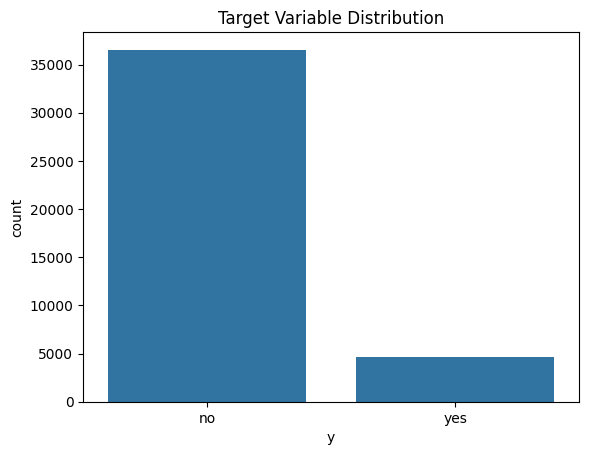

,y,proportion
0,no,0.887337
1,yes,0.112663


In [74]:
sns.countplot(data=df, x='y')
plt.title("Target Variable Distribution")
plt.show()

df['y'].value_counts(normalize=True).reset_index()


### Univariate Analysis

In [75]:
#Create column Names per type
column_types_df = df.dtypes.reset_index()
column_types_df.columns = ['column_name', 'data_type']

#Group by Data type
grouped_by_dtype = column_types_df.groupby('data_type')['column_name'].apply(list).reset_index()

#Add Count to each type
grouped_by_dtype['count'] = grouped_by_dtype['column_name'].apply(len)

grouped_by_dtype

,data_type,column_name,count
0,int64,"[age, duration, campaign, pdays, previous]",5
1,float64,"[emp_var_rate, cons_price_idx, cons_conf_idx, ...",5
2,object,"[job, marital, education, default, housing, lo...",11


In [85]:
# Automatically detect numeric and categorical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


#### Distribution of numeric and categorical features

Numeric Features Distribution


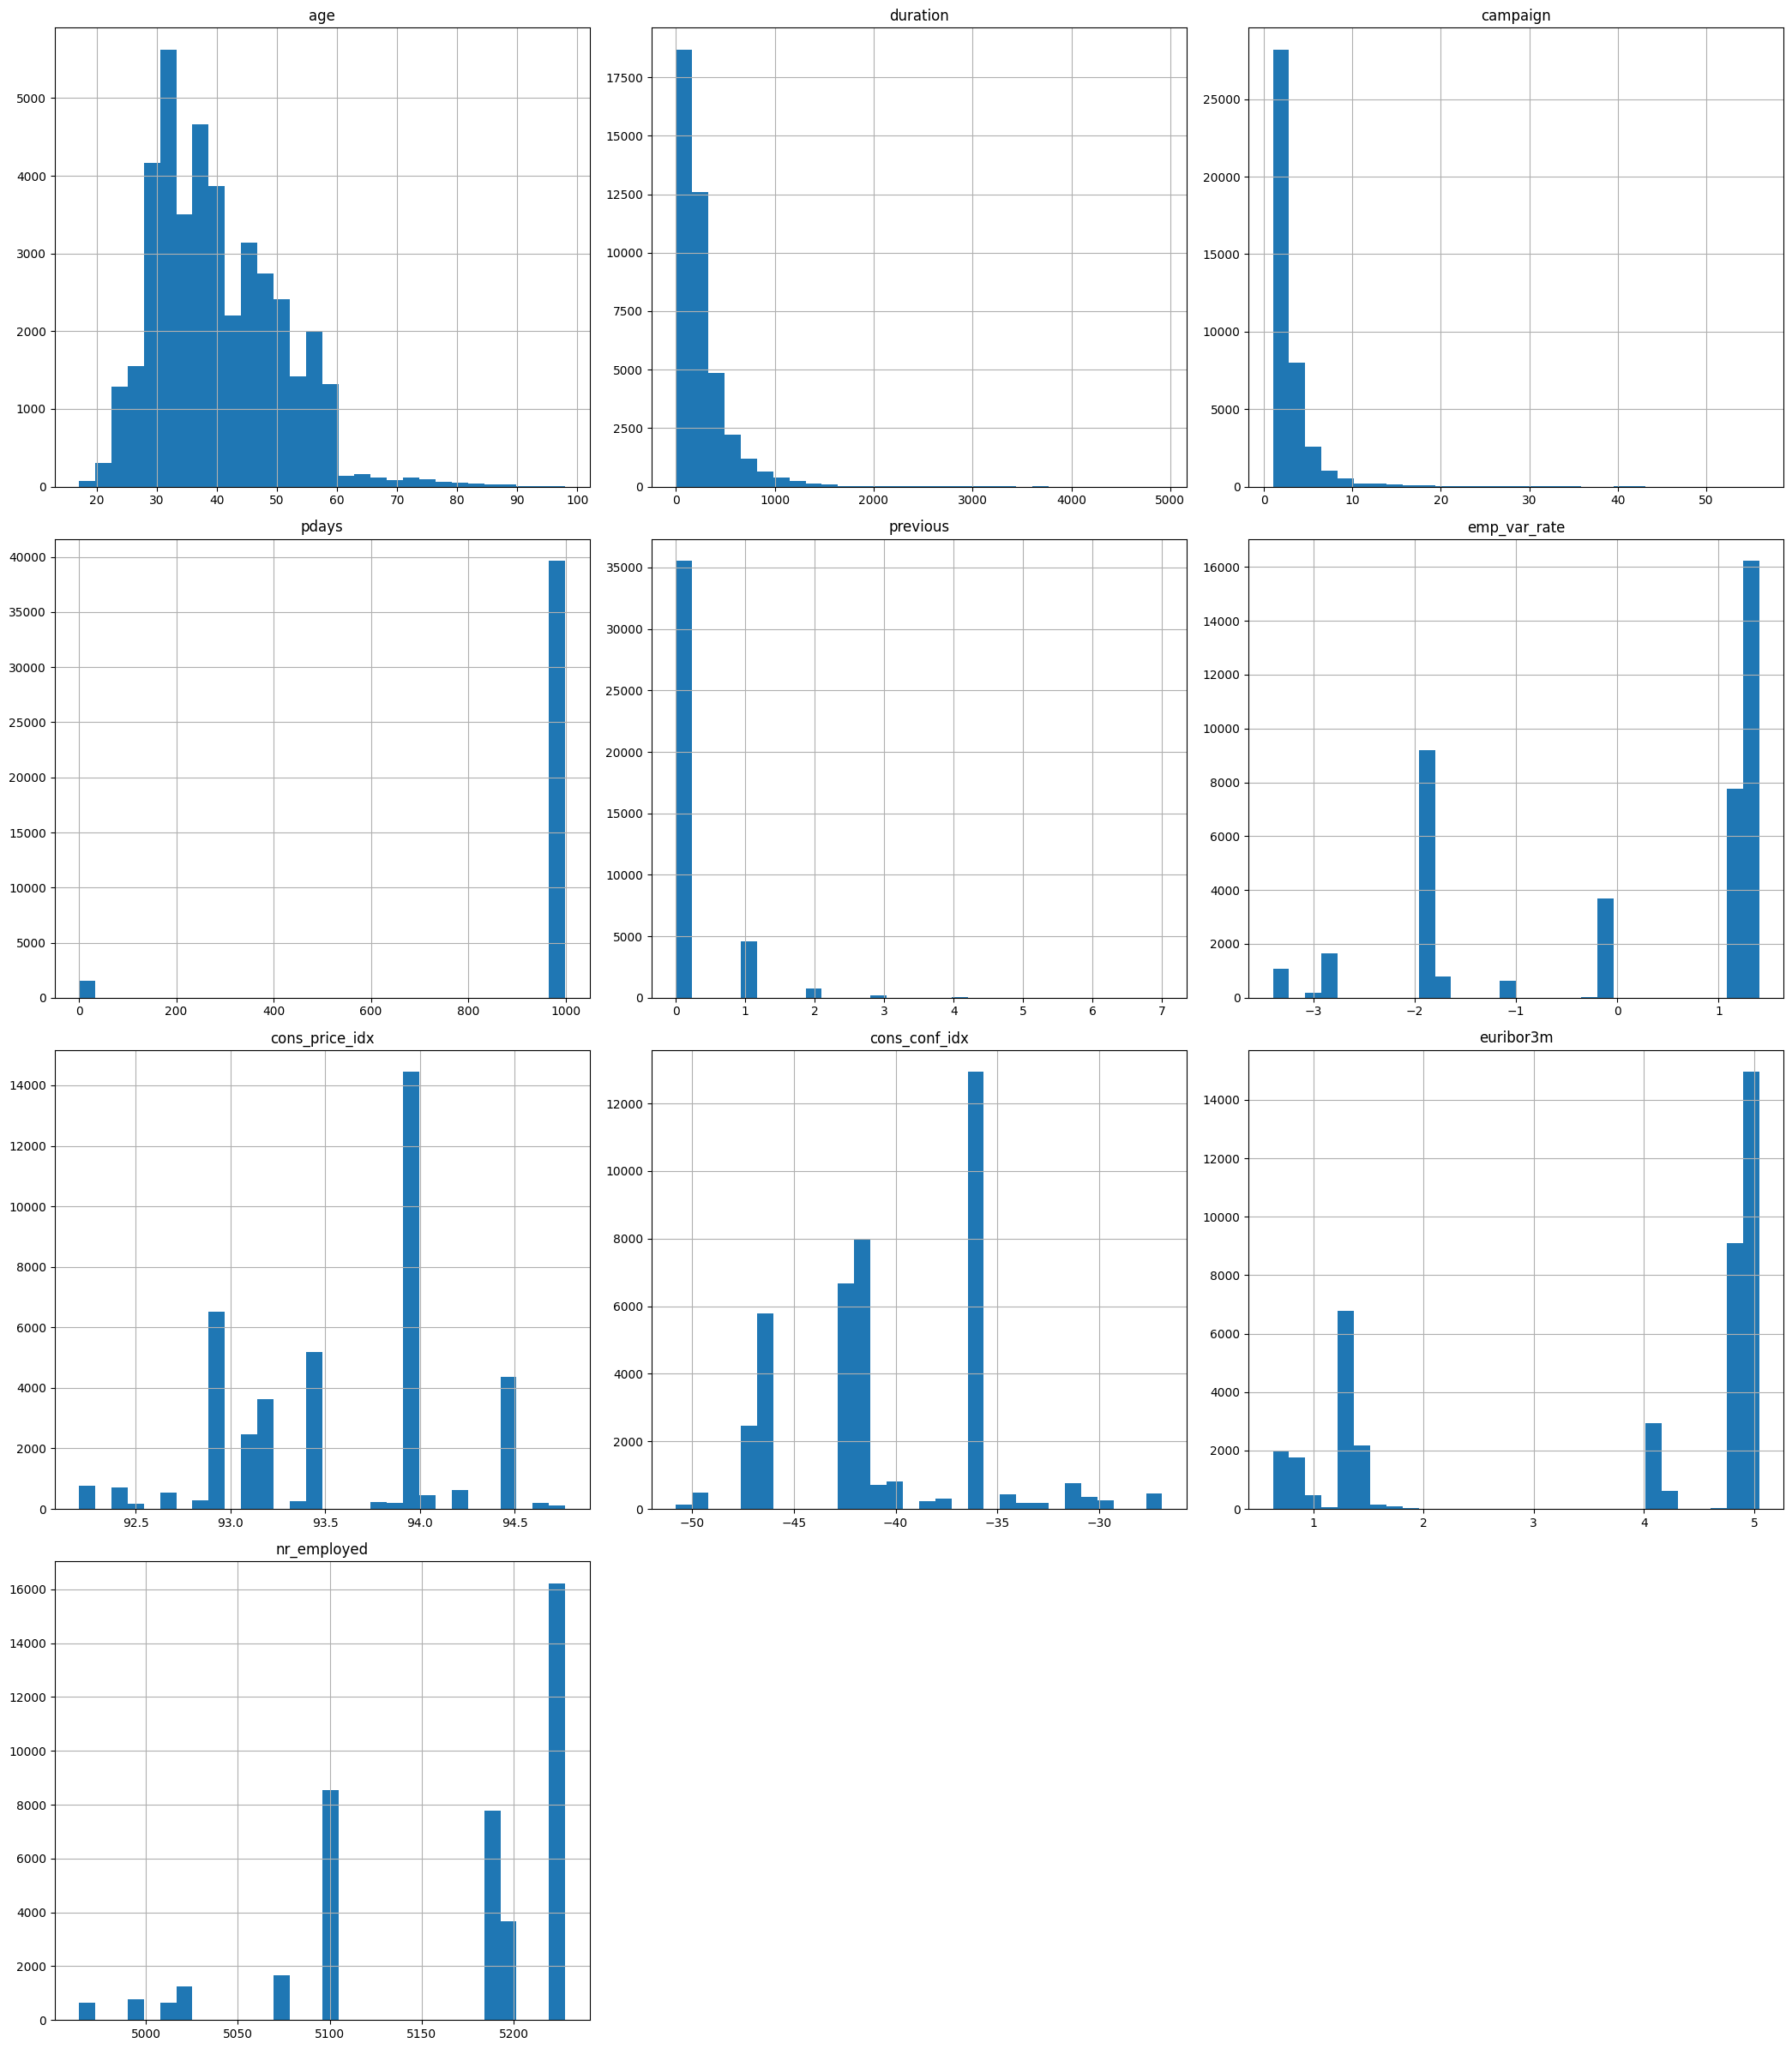

Categorical Features Distribution


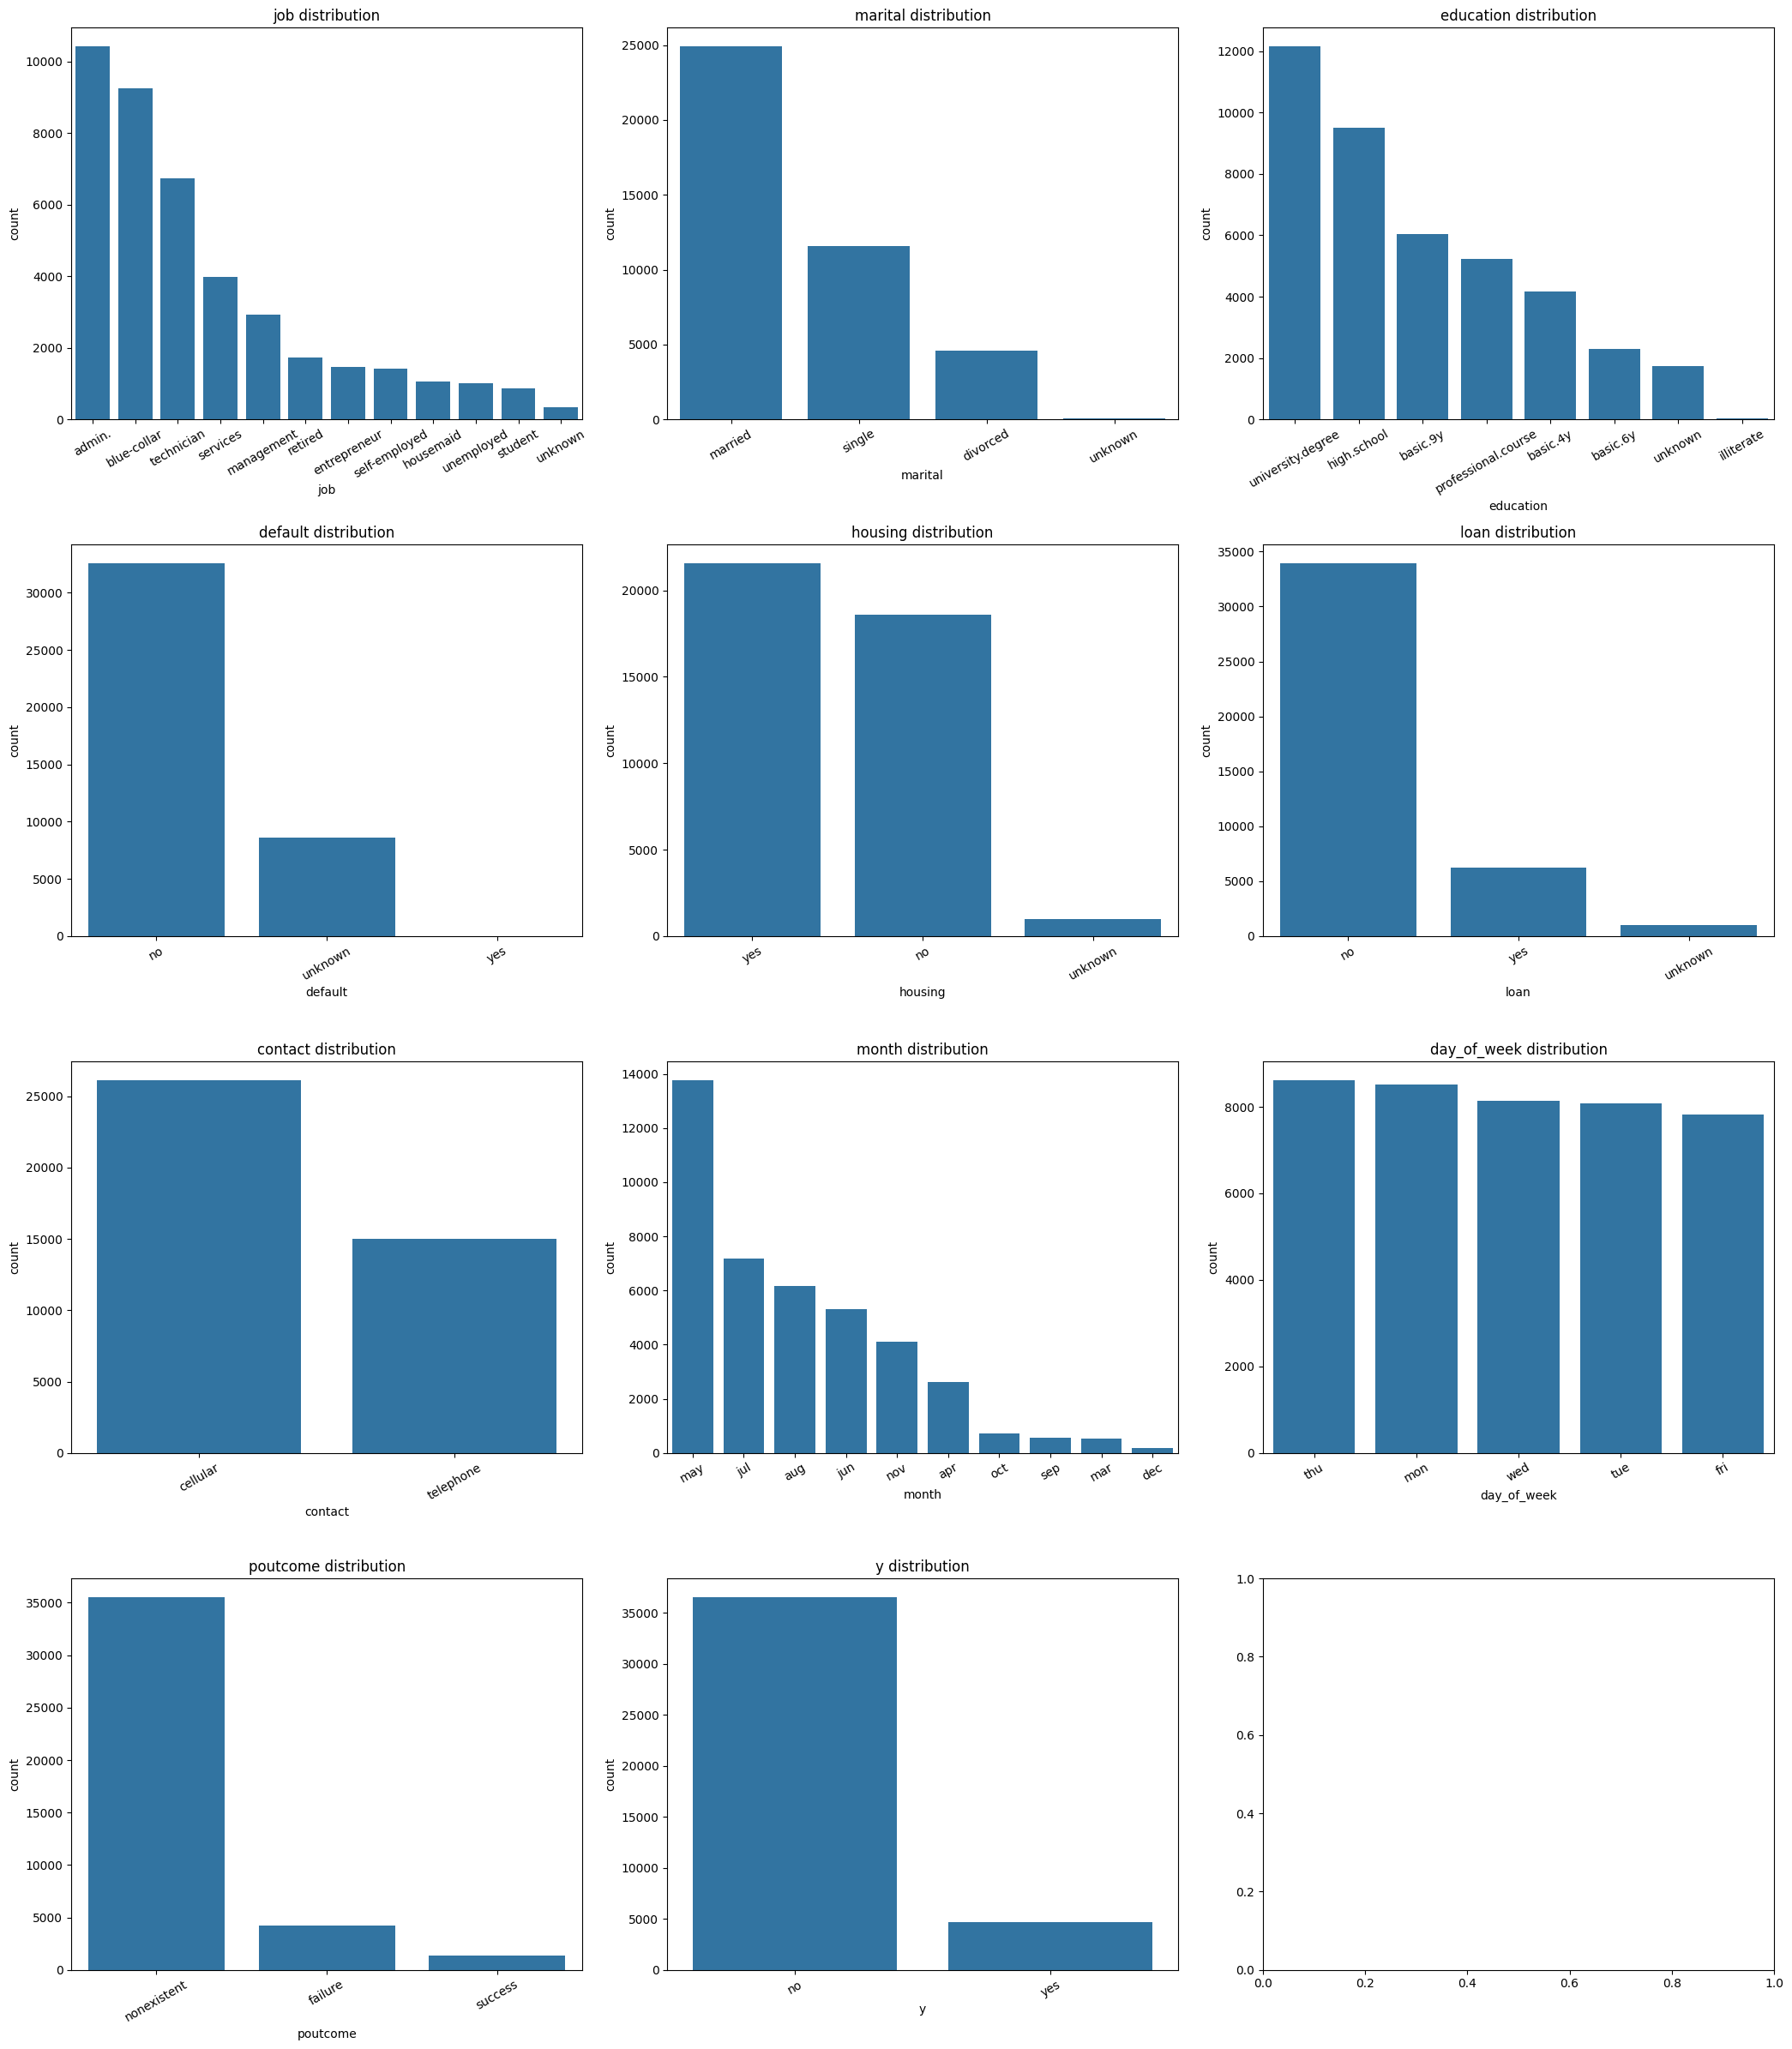

In [101]:
print(f'Numeric Features Distribution')
# Numerical Distribution
df[num_cols].hist(figsize=(21,24), bins=30)
plt.tight_layout()
plt.show()

print(f'Categorical Features Distribution')
# Categorical distribution
# Number of categorical columns
n = len(cat_cols)

# Rows and columns (3 per row) in visaulization
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(21, 6*nrows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"{col} distribution")
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()



### Numeric Correelations

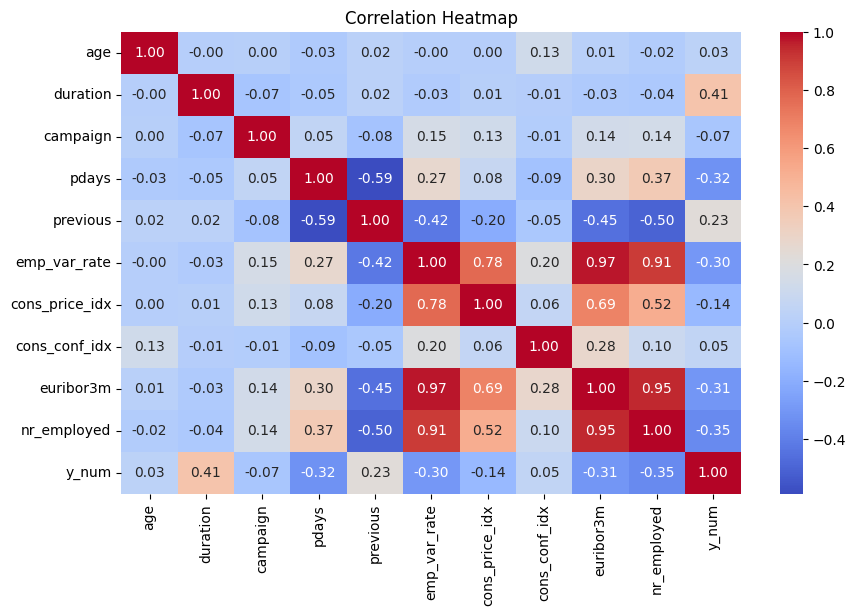

In [102]:
df_corr = df.copy()
df_corr['y_num'] = (df_corr['y']=='yes').astype(int)

plt.figure(figsize=(10,6))
sns.heatmap(df_corr[num_cols+['y_num']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [78]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000
